In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 38.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Data Analyst/Điểm thi đại học 2021/data

/content/drive/MyDrive/Data Analyst/Điểm thi đại học 2021/data


In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Match code provinces with name

In [ ]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [ ]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [ ]:
# Read file data
df = pd.read_csv('./final_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SBD,Tên,Ngày Sinh,Giới tính,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year,code,province
0,18014547,NaN,NaN,NaN,6.4,6.75,NaN,NaN,NaN,4.75,7.00,6.50,4.2,2020,18,Bắc Giang
1,18014530,NaN,NaN,NaN,7.6,6.00,NaN,NaN,NaN,3.75,7.75,7.75,2.8,2020,18,Bắc Giang
2,18014521,NaN,NaN,NaN,4.8,4.75,NaN,NaN,NaN,4.00,6.50,NaN,NaN,2020,18,Bắc Giang
3,18014517,NaN,NaN,NaN,8.0,7.00,NaN,NaN,NaN,8.25,8.00,9.50,5.8,2020,18,Bắc Giang
4,18014523,NaN,NaN,NaN,8.2,6.50,8.0,8.5,5.0,NaN,NaN,NaN,4.0,2020,18,Bắc Giang


In [ ]:
df.columns = ['SBD', 'Ten', 'Ngay_sinh', 'Gioi_tinh', 'Toan', 'Van', 'Ly', 'Hoa',
              'Sinh', 'Lich_su', 'Dia_ly', 'GDCD', 'Ngoai_ngu', 'Year', 'code', 'province']

In [ ]:
# Drop many duplicated rows
df.drop_duplicates(inplace=True)

# Compare histogram between 2020 and 2021

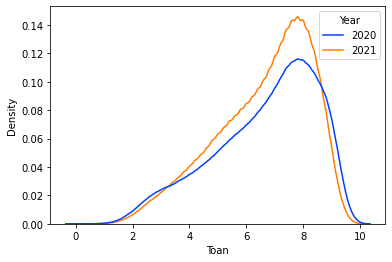

In [ ]:
# Compare math between 2 years
sns.kdeplot(data=df, x='Toan', hue='Year', palette='bright')

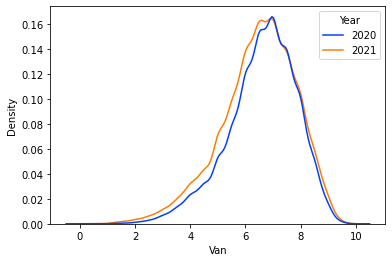

In [ ]:
# Compare literature between 2 years
sns.kdeplot(data=df, x='Van', hue='Year', palette='bright', bw_adjust=2)

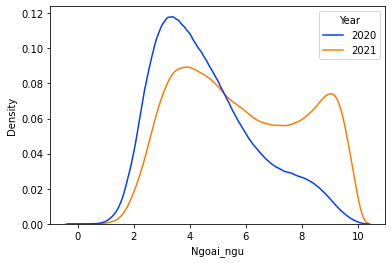

In [ ]:
# Compare English between 2 years
sns.kdeplot(data=df, x='Ngoai_ngu', hue='Year', palette='bright')

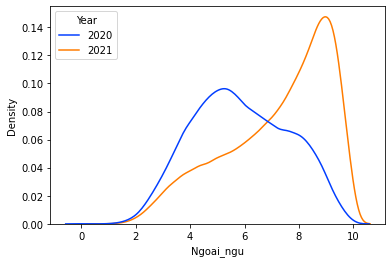

In [ ]:
# Compare English between 2 years
sns.kdeplot(data=df[df['code'] == 2], x='Ngoai_ngu', hue='Year', palette='bright')

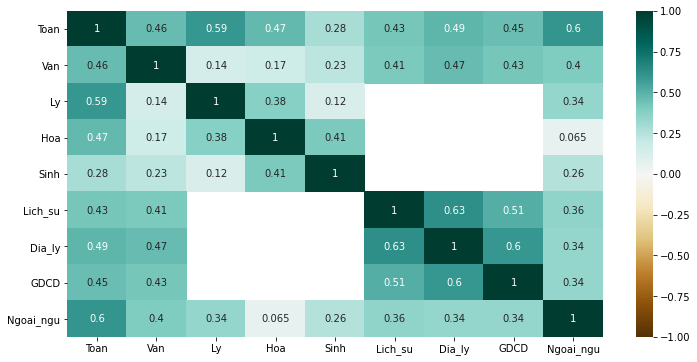

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[df['Year'] == 2021][['Toan', 'Van', 'Ly', 'Hoa',
       'Sinh', 'Lich_su', 'Dia_ly', 'GDCD', 'Ngoai_ngu']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Map

In [ ]:
# Only care year 2021
df_2021 = df[df['Year'] == 2021]

In [ ]:
# Math score
map_df = map_df.merge(df_2021.groupby('province')['Toan'].mean(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Toan': 'toan_avg'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Toan'].std(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Toan': 'toan_std'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Toan'].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Toan': 'toan_>=9'}, inplace=True)

# Literature score
map_df = map_df.merge(df_2021.groupby('province')['Van'].mean(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Van': 'van_avg'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Van'].std(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Van': 'van_std'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Van'].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Van': 'van_>=9'}, inplace=True)

# English score
map_df = map_df.merge(df_2021.groupby('province')['Ngoai_ngu'].mean(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Ngoai_ngu': 'anh_avg'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Ngoai_ngu'].std(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Ngoai_ngu': 'anh_std'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Ngoai_ngu'].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Ngoai_ngu': 'anh_>=9'}, inplace=True)

# History score
map_df = map_df.merge(df_2021.groupby('province')['Lich_su'].mean(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Lich_su': 'su_avg'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Lich_su'].std(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Lich_su': 'su_std'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['Lich_su'].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'Lich_su': 'su_>=9'}, inplace=True)

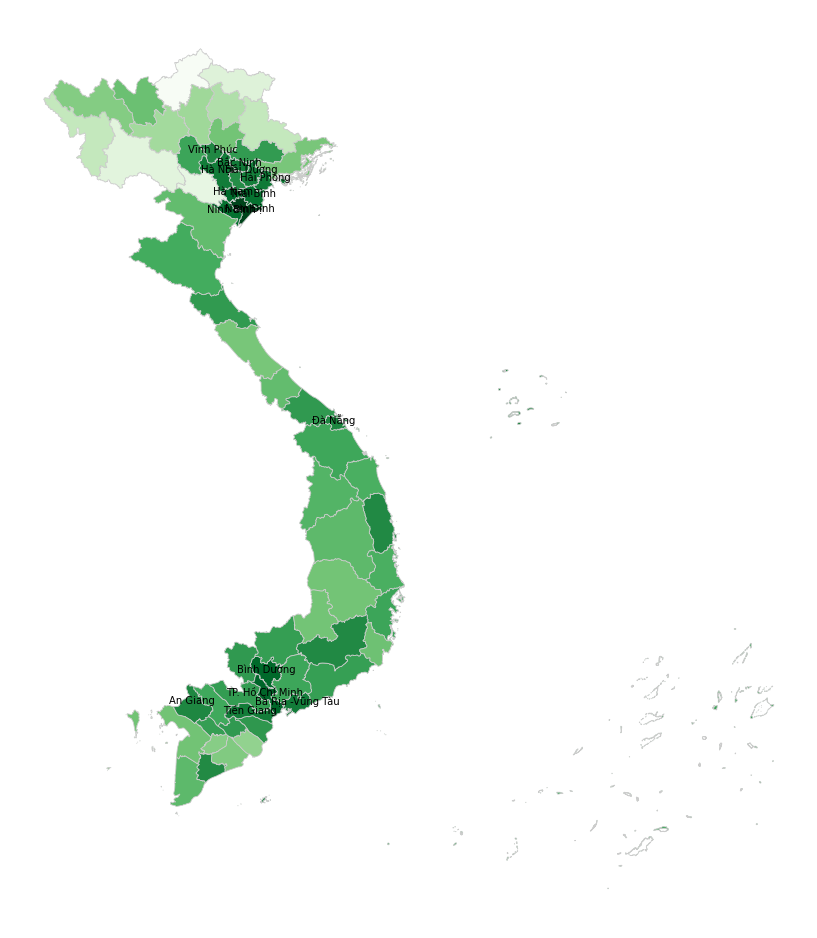

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'toan_avg'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

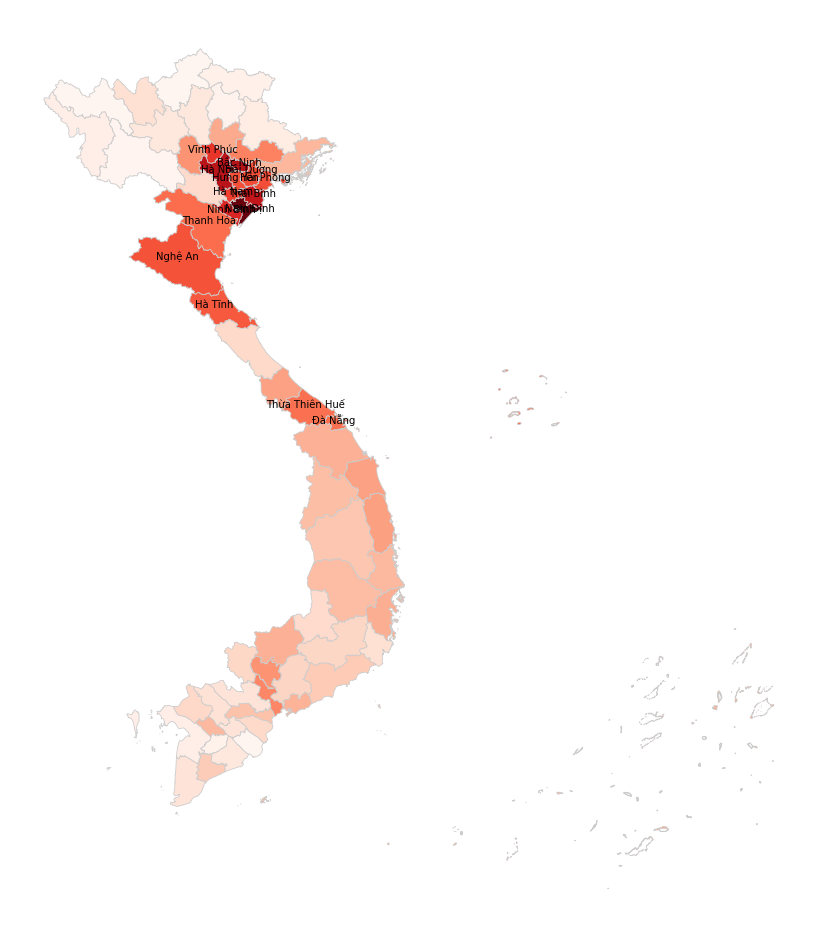

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'toan_>=9'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

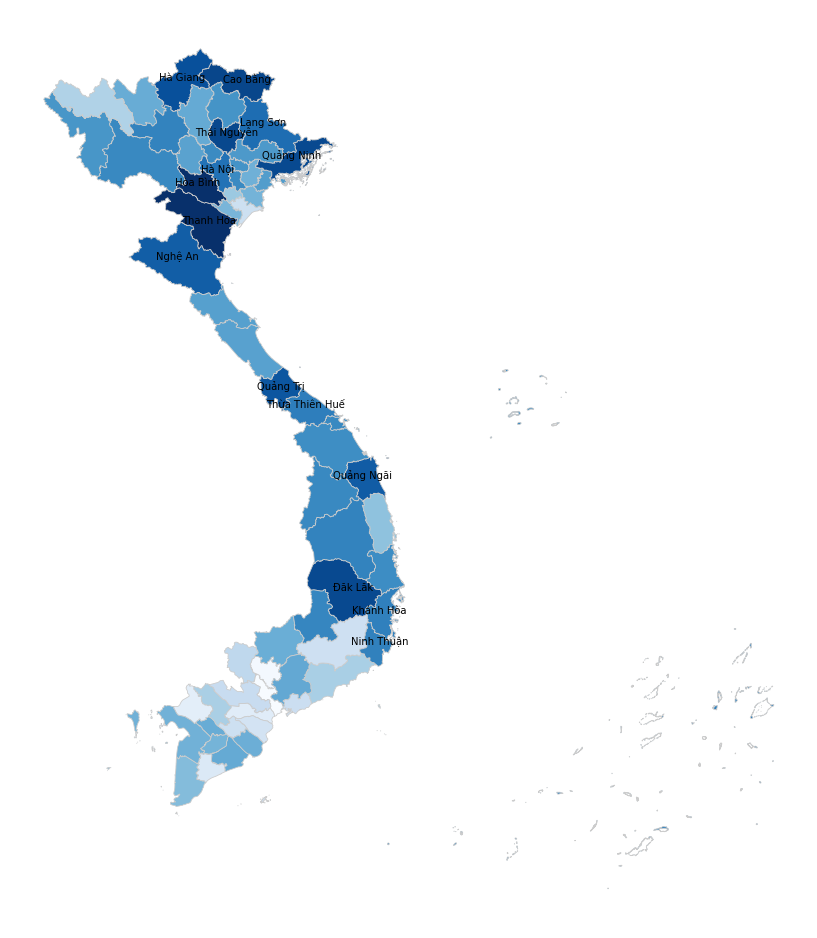

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'toan_std'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

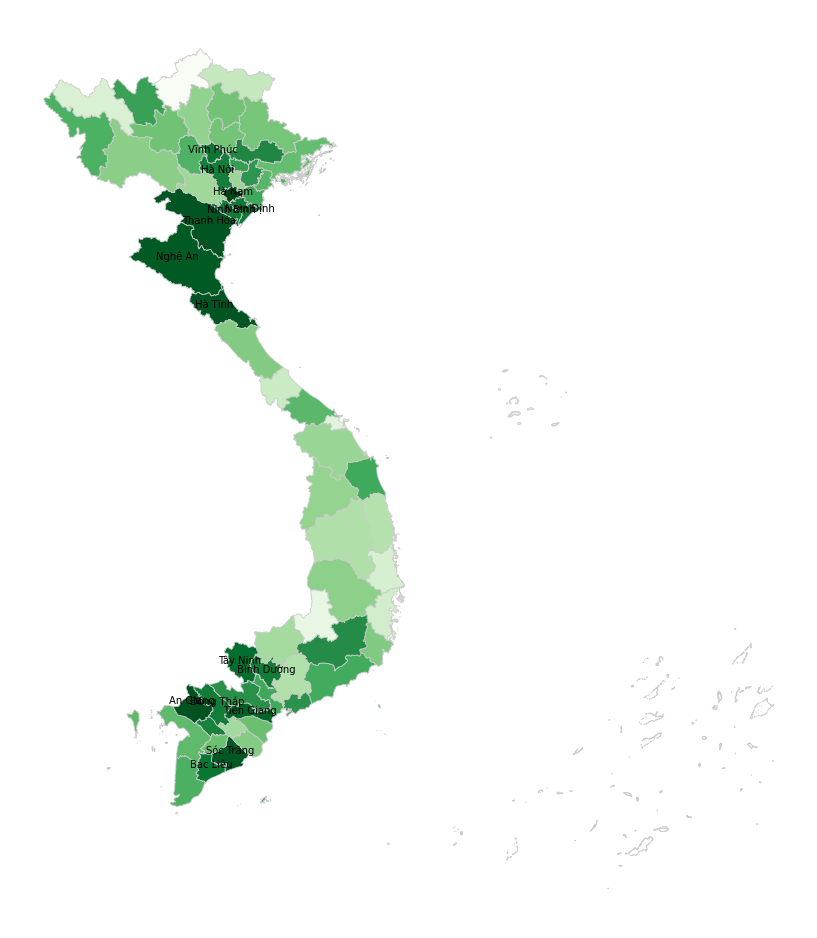

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'van_avg'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

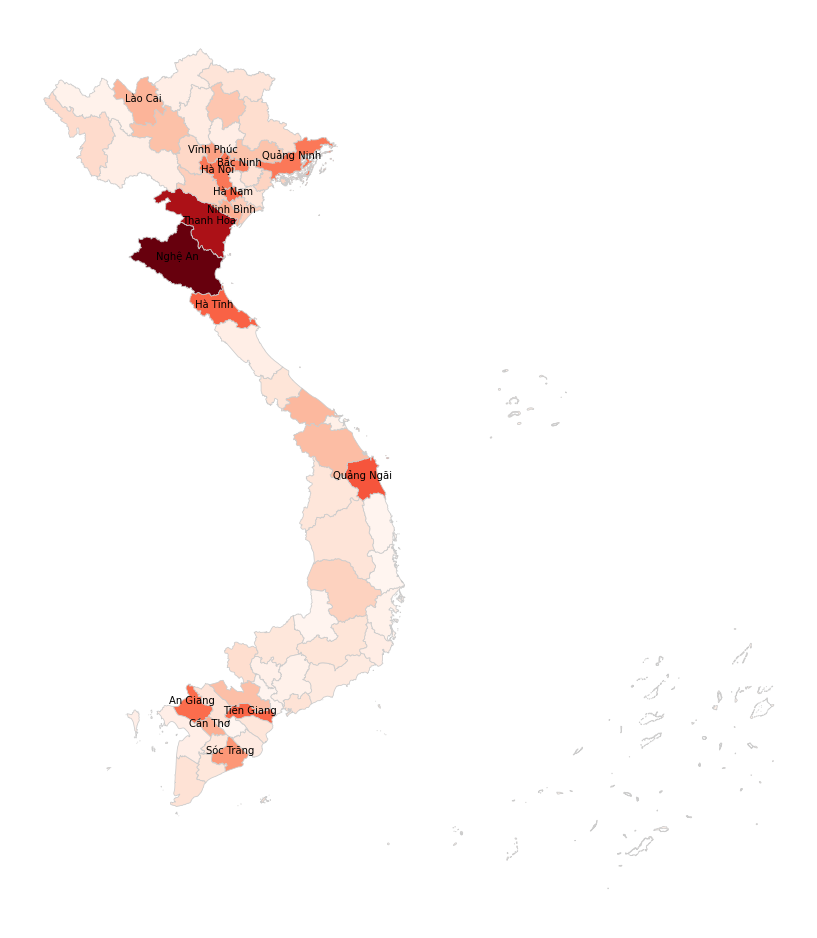

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'van_>=9'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

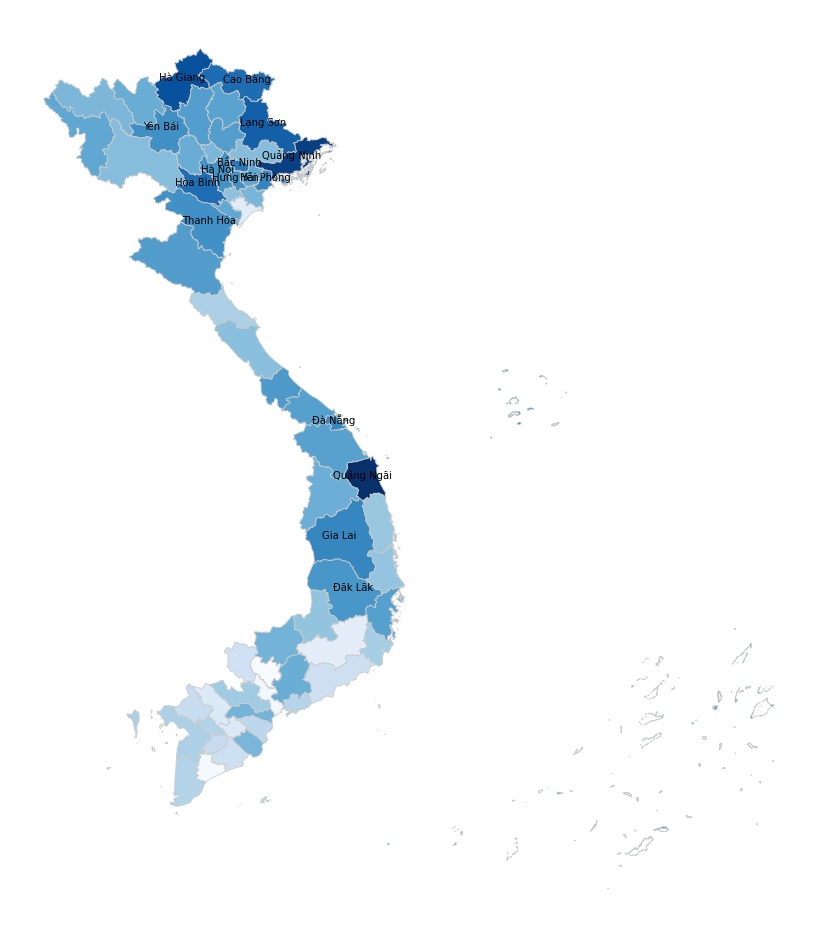

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'van_std'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

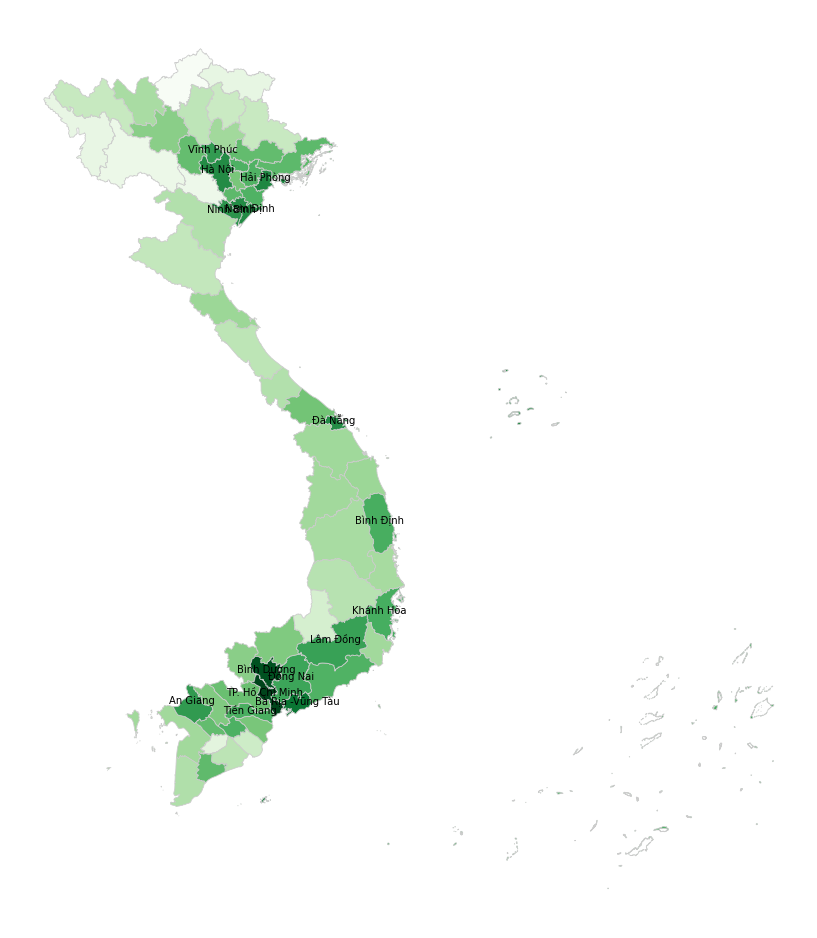

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'anh_avg'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

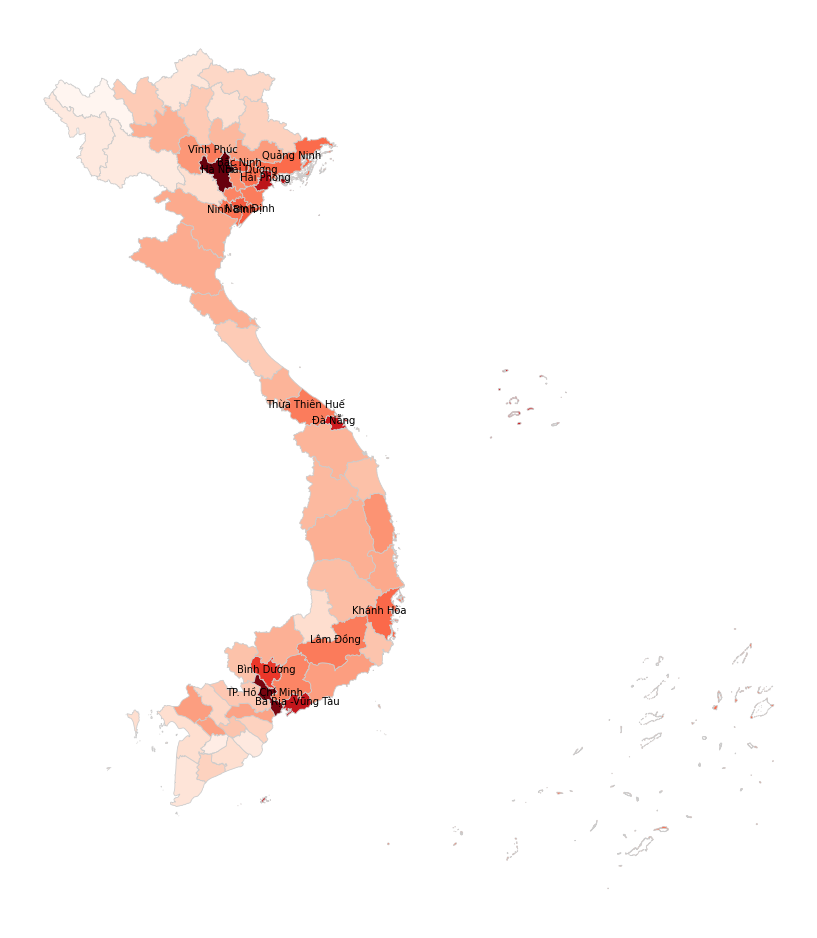

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'anh_>=9'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

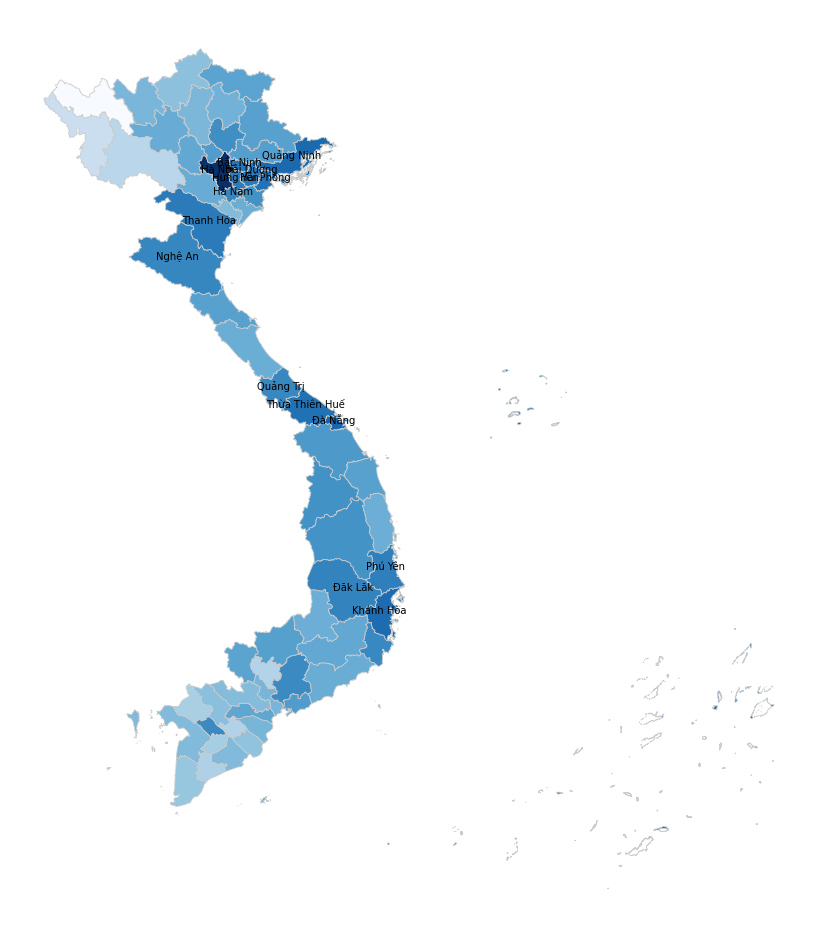

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'anh_std'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

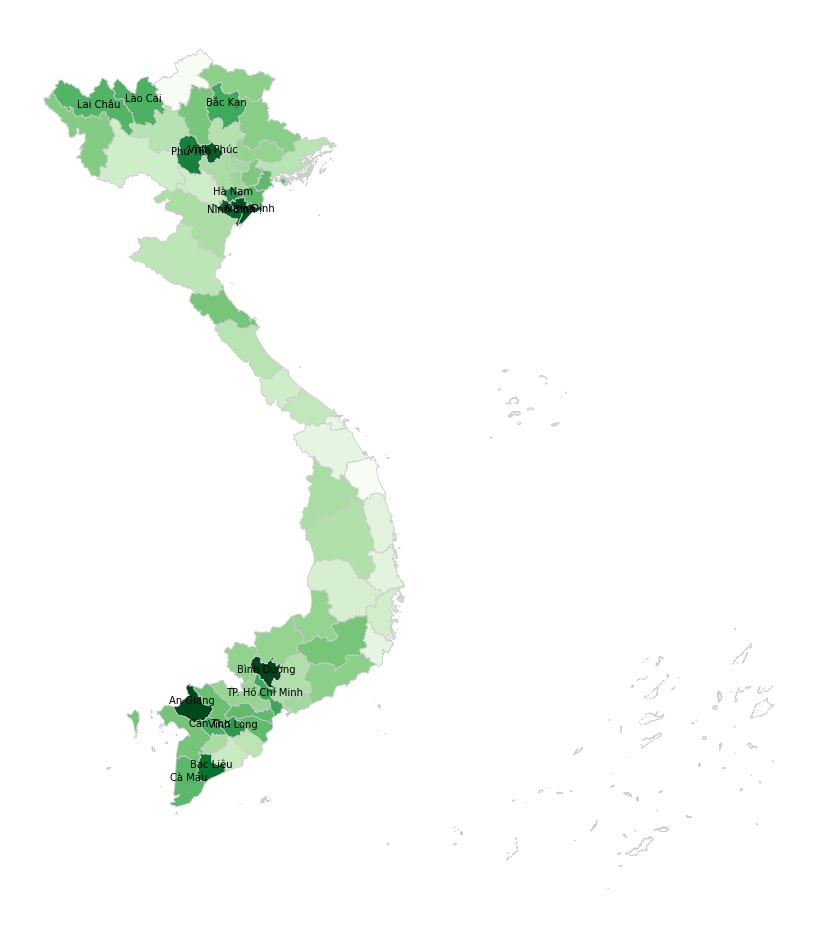

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'su_avg'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

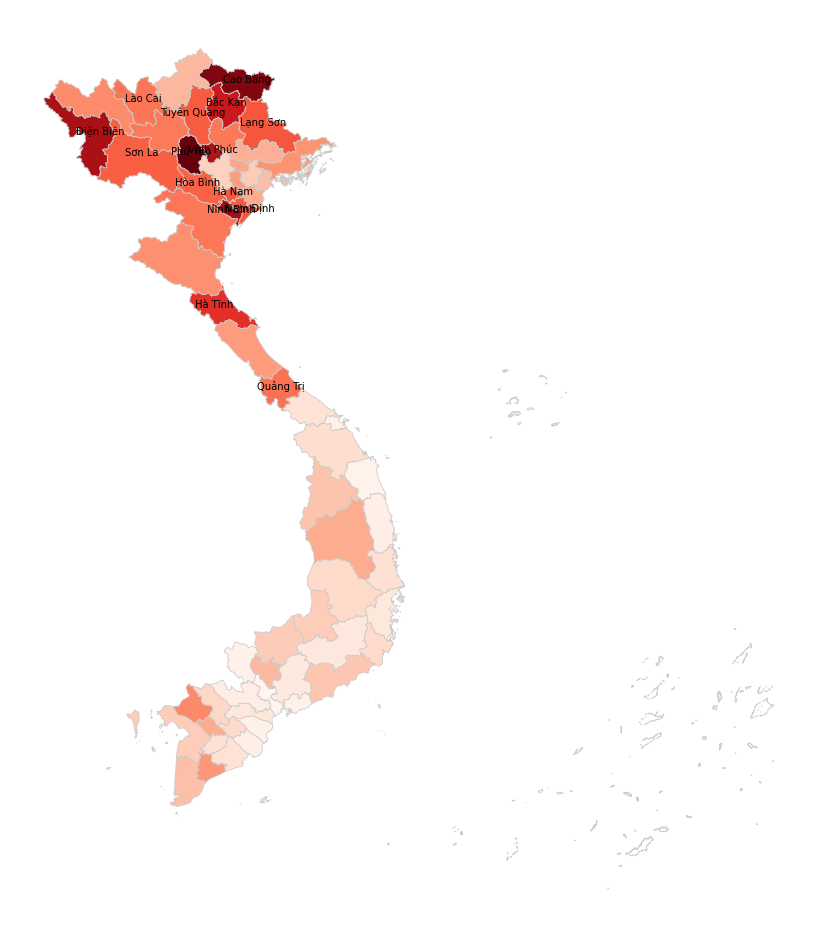

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'su_>=9'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

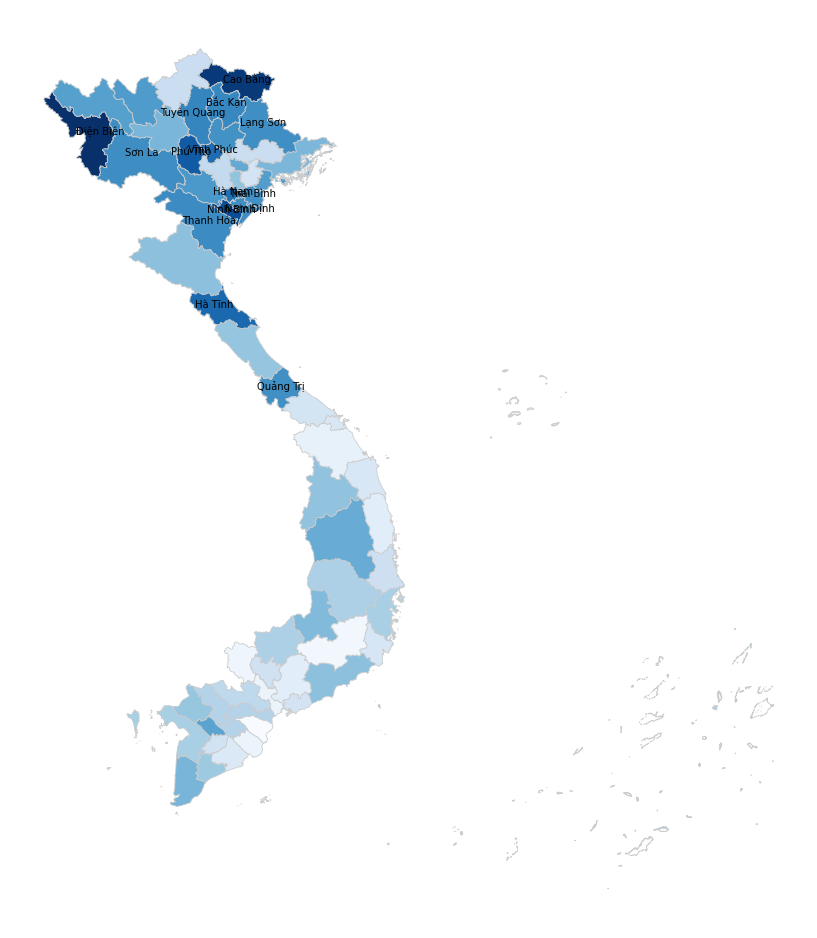

In [ ]:
# Map of math
# set the value column that will be visualised
variable = 'su_std'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
map_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.sort_values(by=[variable], ascending=False, inplace=True)
for idx, row in map_df[:15].iterrows():
    plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

# Correlation with GRDP

In [ ]:
GRDP = pd.read_csv('./GRDP.csv')
GRDP.columns = ['GRDP', 'province', 'population']

# Change name of some provinces
GRDP.loc[0, 'province'] = 'TP. Hồ Chí Minh'
GRDP.loc[6, 'province'] = 'Bà Rịa -Vũng Tàu'
GRDP.loc[20, 'province'] = 'Đăk Lăk'
GRDP.loc[49, 'province'] = 'Quảng Bình'
GRDP.loc[52, 'province'] = 'Đăk Nông'

GRDP.head()

,GRDP,province,population
0,1331440,TP. Hồ Chí Minh,8993082
1,920272,Hà Nội,8053663
2,300278,Đồng Nai,3097107
3,282999,Bình Dương,2426561
4,195540,Hải Phòng,1837173


In [ ]:
GRDP['GRDP_per_capita'] = GRDP['GRDP'] / GRDP['population']
GRDP.sort_values(by='GRDP_per_capita', ascending=False)

,GRDP,province,population,GRDP_per_capita
0,1331440,TP. Hồ Chí Minh,8993082,0.148052
6,149574,Bà Rịa -Vũng Tàu,1148313,0.130255
5,161708,Bắc Ninh,1368840,0.118135
3,282999,Bình Dương,2426561,0.116626
1,920272,Hà Nội,8053663,0.114268
...,...,...,...,...
45,41851,Bến Tre,1288463,0.032481
62,9765,Bắc Kạn,313905,0.031108
61,14429,Cao Bằng,530341,0.027207
59,15750,Điện Biên,598856,0.026300


In [ ]:
# Merge map_df with GRDP information
map_df = map_df.merge(GRDP, how='left', left_on='ten_tinh', right_on='province')

In [ ]:
map_df.columns

Index(['gid', 'code', 'ten_tinh', 'geometry', 'toan_avg', 'toan_std',
       'toan_>=9', 'van_avg', 'van_std', 'van_>=9', 'anh_avg', 'anh_std',
       'anh_>=9', 'su_avg', 'su_std', 'su_>=9', 'coords', 'GRDP', 'province',
       'population', 'GRDP_per_capita'],
      dtype='object')

In [ ]:
# GDCD score
map_df = map_df.merge(df_2021.groupby('province')['GDCD'].mean(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'GDCD': 'GDCD_avg'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['GDCD'].std(), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'GDCD': 'GDCD_std'}, inplace=True)
map_df = map_df.merge(df_2021.groupby('province')['GDCD'].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
map_df.rename(columns={'GDCD': 'GDCD_>=9'}, inplace=True)

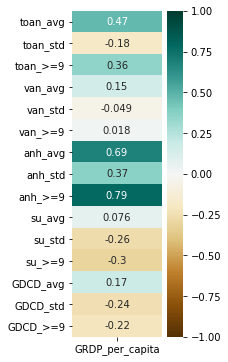

In [ ]:
plt.figure(figsize=(2, 6))
sns.heatmap(pd.DataFrame(map_df[['ten_tinh', 'geometry', 'toan_avg', 'toan_std',
       'toan_>=9', 'van_avg', 'van_std', 'van_>=9', 'anh_avg', 'anh_std',
       'anh_>=9', 'su_avg', 'su_std', 'su_>=9', 'GDCD_avg', 'GDCD_std', 'GDCD_>=9', 
       'GRDP_per_capita']].corr()['GRDP_per_capita']).iloc[:-1], vmin=-1, vmax=1, annot=True, cmap='BrBG')